In [1]:
from scf.qelattice import get_qel
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants.constants import get_silicon_all_scf_data, get_all_structure_info
from create_input.get_filtered_structure_data import get_filtered_structure_path_by_energy
from create_input.get_filtered_structure_data import get_filtered_structure_path_by_force
from create_input.sample_structure import remove_duplicated_structures


In [ ]:
# force_threshold = 50
# all_dirs = get_filtered_structure_path_by_force(force_threshold, is_zbl=False)
# print(len(all_dirs))
# all_dirs = get_filtered_structure_path_by_energy(energy_threshold=-650)


# all_dirs = get_silicon_all_scf_data()

In [2]:
from constants.constants import get_silicon_all_scf_data_sd

# all_dirs = all_dirs + get_silicon_all_scf_data_sd()
# all_dirs = get_silicon_all_scf_data_sd()
# print(len(all_dirs))

path2target = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/84/data'
with open(os.path.join(path2target, 'dirs.txt'), mode='r') as f:
    all_dirs = [s.strip() for s in f.readlines()]
    print(len(all_dirs))

# sampled_df = remove_duplicated_structures(all_dirs)

94994


In [3]:
import random

# all_dirs = random.sample(all_dirs, 20000)
print(len(all_dirs))
all_dirs = list(filter(lambda x: 'mp-149' not in x, all_dirs))
print(len(all_dirs))

94994
19977


In [4]:
# all_dirs = sampled_df['path'].values
result = []

for d in all_dirs:
    try:
        qel = get_qel(d)
        result.append([float(qel.get_energy()), qel.structure_id, int(qel.num_atom), float(qel.get_vol()), d])
    except:
        # print(d)
        continue

In [5]:
result_df = pd.DataFrame(data=result, columns=['energy', 'mpid', 'n_atom', 'vol', 'path'])
result_df['atom_energy'] = result_df['energy'] / result_df['n_atom']
result_df['atom_vol'] = result_df['vol'] / result_df['n_atom']

In [6]:
result_df['mpid'].value_counts()

mp-165        6426
mp-92         5222
mp-1079649    3712
mp-571520     3352
Name: mpid, dtype: int64

<AxesSubplot: xlabel='atom_vol', ylabel='atom_energy'>

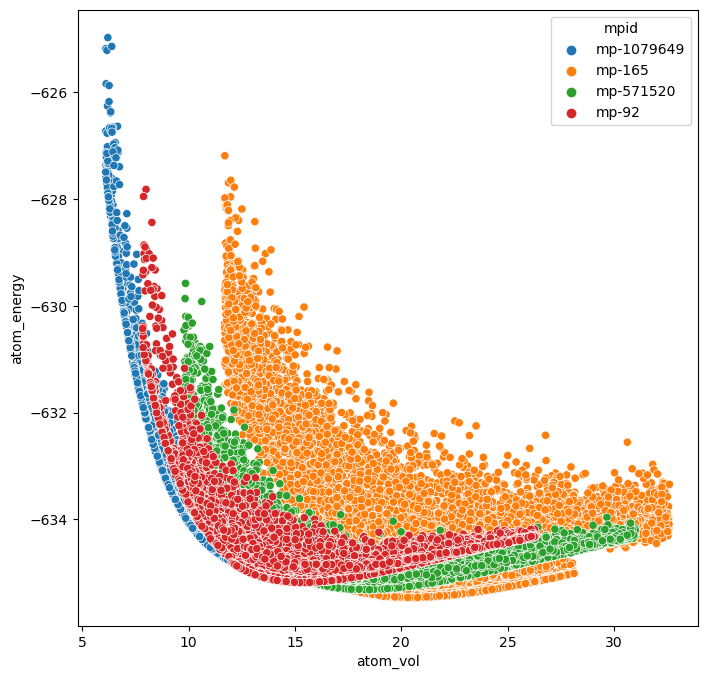

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# ax.set_ylim(-636, -630)


sns.scatterplot(data=result_df.loc[result_df['mpid'] != 'mp-149_dimer'], x='atom_vol', y='atom_energy', ax=ax, hue='mpid')

In [ ]:
# sampled_df = remove_duplicated_structures(all_dirs)

In [ ]:
# sampled_df['mpid'].value_counts()

In [ ]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)
# ax.set_ylim(-636, -630)


# sns.scatterplot(data=sampled_df.loc[result_df['mpid'] != 'mp-149_dimer'], x='atom_vol', y='atom_energy', ax=ax, hue='mpid')

<AxesSubplot: xlabel='atom_energy', ylabel='Count'>

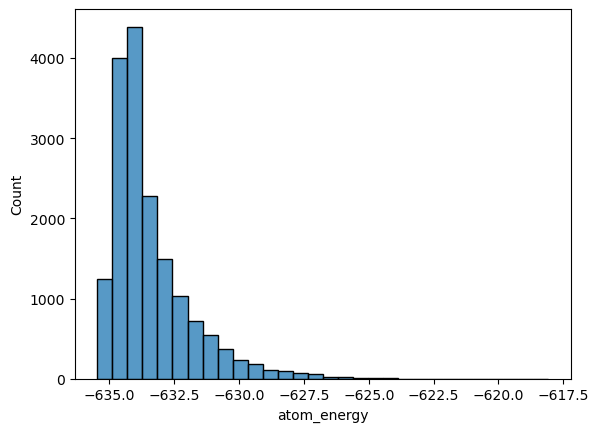

In [14]:
sns.histplot(data=result_df, x='atom_energy', bins=30)

In [15]:
from scipy.stats import skew
skew(result_df['atom_energy'])

1.9265472567991604

In [8]:
force_df_list = []

for d in all_dirs:
    try:
        qel = get_qel(d)
        force_df_each = pd.DataFrame(data=qel.get_force(), columns=['fx', 'fy', 'fz'])
        force_df_each['mpid'] = qel.structure_id
        force_df_list.append(force_df_each.copy())
    except:
        # print(d)
        continue

In [9]:
force_df = pd.concat(force_df_list)

<AxesSubplot: xlabel='fx', ylabel='fz'>

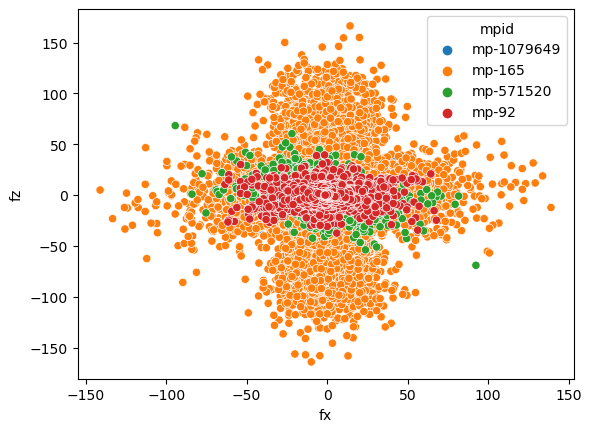

In [10]:
sns.scatterplot(data=force_df, x='fx', y='fz', hue='mpid')

In [ ]:
plt.hist(force_df['fx'], bins=30)

In [ ]:
plt.hist(force_df.query('fx > 0.5')['fx'], bins=30)

In [ ]:
get_all_structure_info()

In [ ]:
from create_input.from_scf_minus_lmp import ScfMinusLammpsN2p2

result = []
force_df_list = []
removed = []

for d in all_dirs:
    try:
        n2p2_obj = ScfMinusLammpsN2p2(d, 'dump.out', is_comment=True)
        qel = n2p2_obj.qel
        # if np.all(np.abs(n2p2_obj.get_calced_force()) < 10):
        #     removed.append(d)
        #     continue
        result.append([float(n2p2_obj.get_calced_energy()), qel.structure_id, int(qel.num_atom), float(qel.get_vol())])

        force_df_each = pd.DataFrame(data=n2p2_obj.get_calced_force(), columns=['fx', 'fy', 'fz'])
        force_df_each['mpid'] = qel.structure_id
        force_df_list.append(force_df_each.copy())
    except:
        print(d)
        continue

result_df = pd.DataFrame(data=result, columns=['energy', 'mpid', 'n_atom', 'vol'])
result_df['atom_energy'] = result_df['energy'] / result_df['n_atom']
result_df['atom_vol'] = result_df['vol'] / result_df['n_atom']

force_df = pd.concat(force_df_list)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

sns.scatterplot(data=result_df.loc[result_df['mpid'] != 'mp-149_dimer'], x='atom_vol', y='atom_energy', ax=ax, hue='mpid')

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# sns.scatterplot(data=force_df, x='fx', y='fz', hue='mpid')
sns.scatterplot(data=force_df, x='fx', y='fy', hue='mpid')

In [ ]:
plt.hist(force_df.loc[force_df['mpid'] != 'mp-149']['fx'], bins=30)